# Exercise 11.2 #

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plt.rcParams["figure.figsize"] = (9.5,6)

In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

## Input data creation ##

Function to fit:
$$ f(x) = 4-3x-2x^2+3x^3 $$
$$ x \in [-1,1] $$

Number of input data:
- $N_{train} = 1800 $
- $N_{validation} = 200 $

Amount of normal noise in the data:
- $\sigma = 0.2 $


In [4]:
# target parameters of f(x) = 4 -3x -2x^2 +3x^3
a = 4
b = -3
c = -2
d = +3

def f(x,a,b,c,d):
    return  a + b*x + c*x**2 + d*x**3 

lowb = -1
uppb = 1

In [5]:
#number of input data
ntrain = 1800
nvalid = 200

# noise standard deviation
sigma = 0.2 

#model epochs
nepoch = 50

In [6]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(lowb, uppb, ntrain)
x_valid = np.random.uniform(lowb, uppb, nvalid)
x_valid.sort()
y_target = f(x_valid,a,b,c,d)  # target function

y_train = np.random.normal(f(x_train,a,b,c,d), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid,a,b,c,d), sigma)

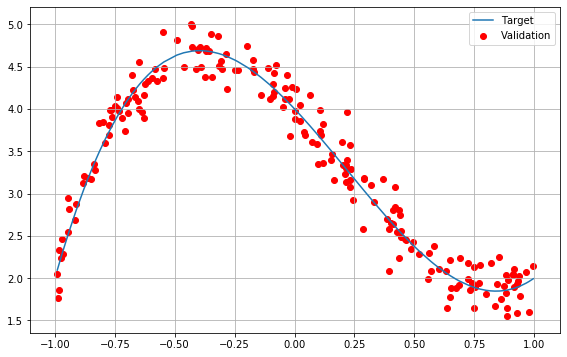

In [7]:
# plot training and target dataset
plt.plot(x_valid, y_target, label='Target')
plt.scatter(x_valid, y_valid, color='r', label = 'Validation')
plt.grid(True)
plt.legend()
plt.show()

## Model A ## 
### Construction and training ##

In [8]:

#create model A
modelA = tf.keras.Sequential()
modelA.add(Dense(16, input_shape=(1,), activation='relu'))
modelA.add(Dense(16, activation='tanh'))
modelA.add(Dense(16, activation='relu'))

modelA.add(Dense(1))

# compile the modelA choosing optimizer, loss and metrics objects
modelA.compile(optimizer='sgd', loss='mse', metrics=['mse'])

modelA.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit the model using training dataset
# report training progress against validation data

historyA = modelA.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nepoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 0s 206us/step - loss: 3.3142 - mean_squared_error: 3.3142 - val_loss: 0.6423 - val_mean_squared_error: 0.6423
Epoch 2/50
1800/1800 [==============================] - 0s 73us/step - loss: 0.5753 - mean_squared_error: 0.5753 - val_loss: 0.4794 - val_mean_squared_error: 0.4794
Epoch 3/50
1800/1800 [==============================] - 0s 79us/step - loss: 0.4565 - mean_squared_error: 0.4565 - val_loss: 0.4204 - val_mean_squared_error: 0.4204
Epoch 4/50
1800/1800 [==============================] - 0s 78us/step - loss: 0.3970 - mean_squared_error: 0.3970 - val_loss: 0.3567 - val_mean_squared_error: 0.3567
Epoch 5/50
1800/1800 [==============================] - 0s 69us/step - loss: 0.3451 - mean_squared_error: 0.3451 - val_loss: 0.3187 - val_mean_squared_error: 0.3187
Epoch 6/50
1800/1800 [==============================] - 0s 52us/step - loss: 0.2939 - mean_squared_error: 0.2939 - val_loss: 0.

### Training results and prediction ###

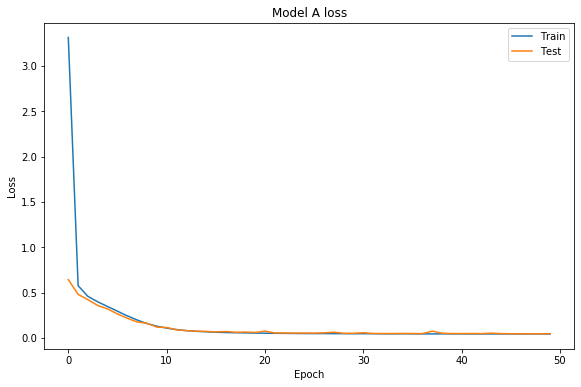


Model A performance:
Test loss with validation data = 0.045
Test loss with target data = 0.004


In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(historyA.history['loss'])
plt.plot(historyA.history['val_loss'])
plt.title('Model A loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# evaluate model with the va curve
score_valid = modelA.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_target = modelA.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Model A performance:')
print('Test loss with validation data = {0:.3f}' .format(score_valid[0]))
print('Test loss with target data = {0:.3f}' .format(score_target[0]))

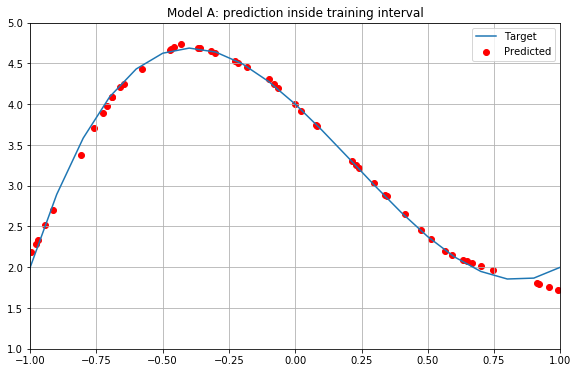

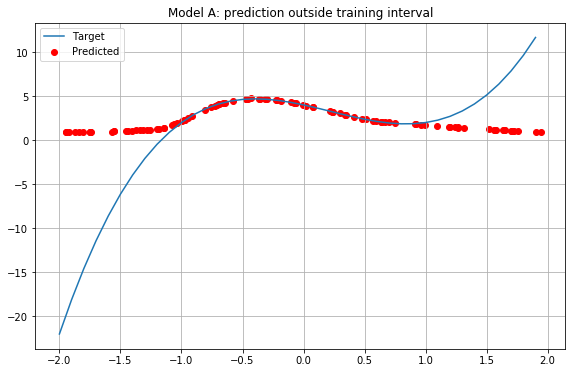

In [11]:
X = np.arange(-2, 2, 0.1)
Y = f(X,a,b,c,d)

x_predicted_A = np.random.uniform(-2, 2, 100)
y_predicted_A = modelA.predict(x_predicted_A)


plt.scatter(x_predicted_A, y_predicted_A,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.xlim(lowb,uppb)
plt.ylim(1,5)
plt.legend()
plt.title('Model A: prediction inside training interval')
plt.show()



plt.scatter(x_predicted_A, y_predicted_A,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.legend()
plt.title('Model A: prediction outside training interval')
plt.show()

## Model B ## 
### Construction and training ##

In [12]:
#create model B
modelB = tf.keras.Sequential()
modelB.add(Dense(16, input_shape=(1,), activation='relu'))
modelB.add(Dense(16, activation='tanh'))
modelB.add(Dense(16, activation='relu'))

modelB.add(Dense(1))

# compile the model B choosing optimizer, loss and metrics objects
modelB.compile(optimizer='sgd', loss='mae', metrics=['mse'])

modelB.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [13]:
# fit the model using training dataset
# report training progress against validation data

historyB = modelB.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nepoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 0s 231us/step - loss: 2.2076 - mean_squared_error: 6.4226 - val_loss: 0.9919 - val_mean_squared_error: 1.4000
Epoch 2/50
1800/1800 [==============================] - 0s 52us/step - loss: 0.7269 - mean_squared_error: 0.7644 - val_loss: 0.4701 - val_mean_squared_error: 0.4265
Epoch 3/50
1800/1800 [==============================] - 0s 50us/step - loss: 0.4443 - mean_squared_error: 0.4467 - val_loss: 0.4237 - val_mean_squared_error: 0.4680
Epoch 4/50
1800/1800 [==============================] - 0s 56us/step - loss: 0.4089 - mean_squared_error: 0.4455 - val_loss: 0.4053 - val_mean_squared_error: 0.4189
Epoch 5/50
1800/1800 [==============================] - 0s 54us/step - loss: 0.3883 - mean_squared_error: 0.4020 - val_loss: 0.3845 - val_mean_squared_error: 0.4019
Epoch 6/50
1800/1800 [==============================] - 0s 50us/step - loss: 0.3690 - mean_squared_error: 0.3561 - val_loss: 0.

### Training results and prediction ###

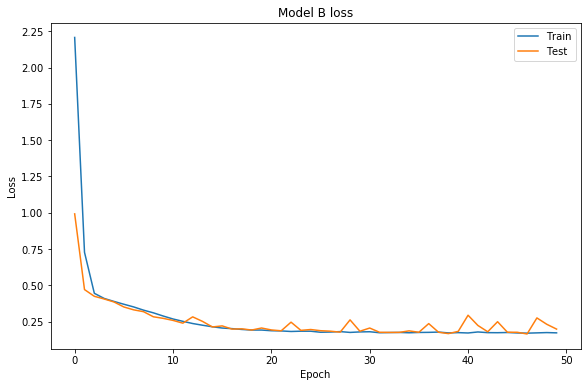


Model B performance:
Test loss with validation data = 0.198
Test loss with target data = 0.141


In [14]:
# look into training history
# Plot training & validation loss values
plt.plot(historyB.history['loss'])
plt.plot(historyB.history['val_loss'])
plt.title('Model B loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# evaluate model with the va curve
score_valid = modelB.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_target = modelB.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Model B performance:')
print('Test loss with validation data = {0:.3f}' .format(score_valid[0]))
print('Test loss with target data = {0:.3f}' .format(score_target[0]))

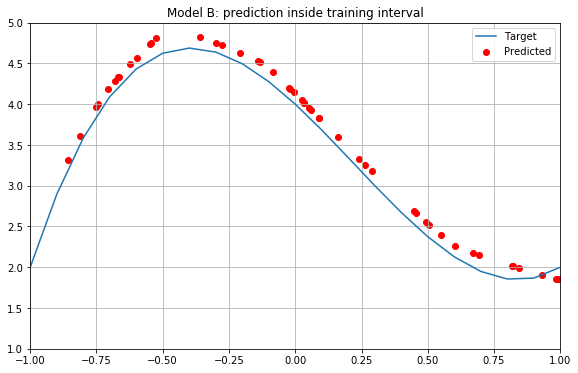

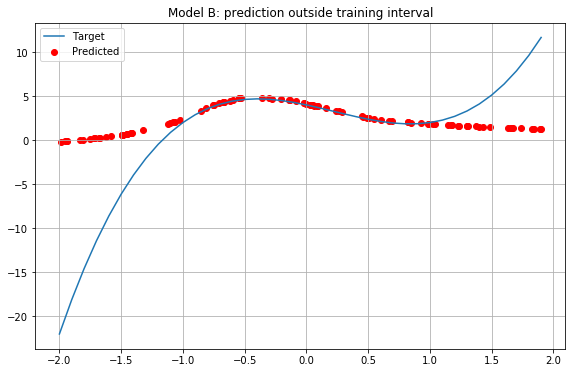

In [15]:
X = np.arange(-2, 2, 0.1)
Y = f(X,a,b,c,d)

x_predicted_B = np.random.uniform(-2, 2, 100)
y_predicted_B = modelB.predict(x_predicted_B)


plt.scatter(x_predicted_B, y_predicted_B,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.xlim(lowb,uppb)
plt.ylim(1,5)
plt.legend()
plt.title('Model B: prediction inside training interval')
plt.show()



plt.scatter(x_predicted_B, y_predicted_B,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.legend()
plt.title('Model B: prediction outside training interval')
plt.show()

## Model C ## 
### Construction and training ##

In [16]:
#create model C
modelC = tf.keras.Sequential()
modelC.add(Dense(8, input_shape=(1,), activation='relu'))
modelC.add(Dense(8, activation='tanh'))

modelC.add(Dense(1))

# compile the model C choosing optimizer, loss and metrics objects
modelC.compile(optimizer='sgd', loss='mse', metrics=['mse'])

modelC.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fit the model using training dataset
# report training progress against validation data

historyC = modelC.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nepoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 0s 202us/step - loss: 2.1848 - mean_squared_error: 2.1848 - val_loss: 0.5077 - val_mean_squared_error: 0.5077
Epoch 2/50
1800/1800 [==============================] - 0s 64us/step - loss: 0.4701 - mean_squared_error: 0.4701 - val_loss: 0.4168 - val_mean_squared_error: 0.4168
Epoch 3/50
1800/1800 [==============================] - 0s 52us/step - loss: 0.4050 - mean_squared_error: 0.4050 - val_loss: 0.3721 - val_mean_squared_error: 0.3721
Epoch 4/50
1800/1800 [==============================] - 0s 49us/step - loss: 0.3606 - mean_squared_error: 0.3606 - val_loss: 0.3325 - val_mean_squared_error: 0.3325
Epoch 5/50
1800/1800 [==============================] - 0s 52us/step - loss: 0.3185 - mean_squared_error: 0.3185 - val_loss: 0.2908 - val_mean_squared_error: 0.2908
Epoch 6/50
1800/1800 [==============================] - 0s 52us/step - loss: 0.2824 - mean_squared_error: 0.2824 - val_loss: 0.

### Training results and prediction ###

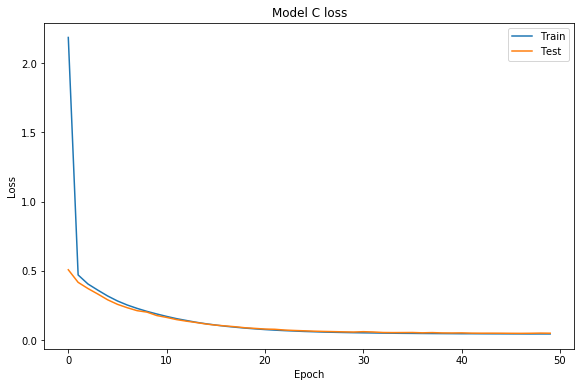


Model C performance:
Test loss with validation data = 0.050
Test loss with target data = 0.008


In [18]:
# look into training history
# Plot training & validation loss values
plt.plot(historyC.history['loss'])
plt.plot(historyC.history['val_loss'])
plt.title('Model C loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# evaluate model with the va curve
score_valid = modelC.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_target = modelC.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Model C performance:')
print('Test loss with validation data = {0:.3f}' .format(score_valid[0]))
print('Test loss with target data = {0:.3f}' .format(score_target[0]))

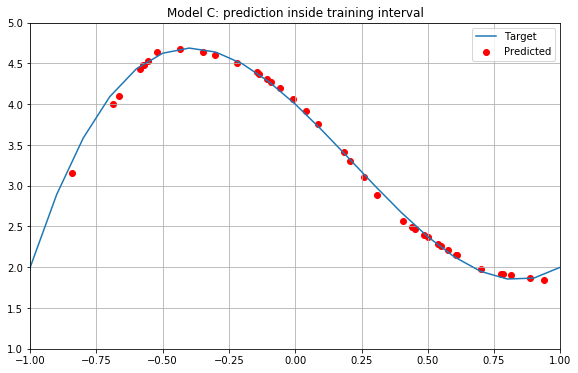

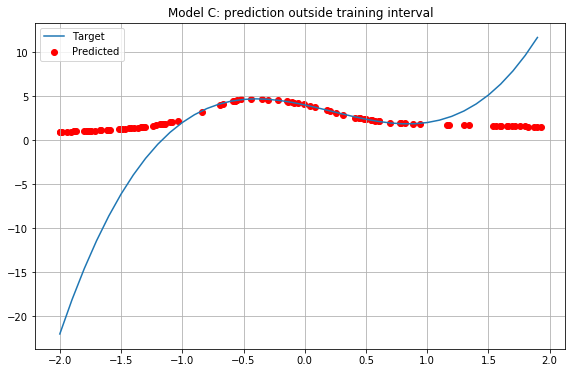

In [19]:
X = np.arange(-2, 2, 0.1)
Y = f(X,a,b,c,d)

x_predicted_C = np.random.uniform(-2, 2, 100)
y_predicted_C = modelC.predict(x_predicted_C)

plt.scatter(x_predicted_C, y_predicted_C,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.xlim(lowb,uppb)
plt.ylim(1,5)
plt.legend()
plt.title('Model C: prediction inside training interval')
plt.show()

plt.scatter(x_predicted_C, y_predicted_C,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.legend()
plt.title('Model C: prediction outside training interval')
plt.show()

## Model D ## 
### Construction and training ##

In [20]:
#create model D
modelD = tf.keras.Sequential()
modelD.add(Dense(32, input_shape=(1,), activation='relu'))
#modelD.add(Dense(16, activation='tanh'))
#modelD.add(Dense(16, activation='relu'))

modelD.add(Dense(1))

# compile the model D choosing optimizer, loss and metrics objects
modelD.compile(optimizer='sgd', loss='mse', metrics=['mse'])

modelD.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [21]:
# fit the model using training dataset
# report training progress against validation data

historyD = modelD.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nepoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 0s 243us/step - loss: 2.9044 - mean_squared_error: 2.9044 - val_loss: 0.5794 - val_mean_squared_error: 0.5794
Epoch 2/50
1800/1800 [==============================] - 0s 68us/step - loss: 0.5626 - mean_squared_error: 0.5626 - val_loss: 0.5090 - val_mean_squared_error: 0.5090
Epoch 3/50
1800/1800 [==============================] - 0s 64us/step - loss: 0.5091 - mean_squared_error: 0.5091 - val_loss: 0.4740 - val_mean_squared_error: 0.4740
Epoch 4/50
1800/1800 [==============================] - 0s 53us/step - loss: 0.4735 - mean_squared_error: 0.4735 - val_loss: 0.4441 - val_mean_squared_error: 0.4441
Epoch 5/50
1800/1800 [==============================] - 0s 43us/step - loss: 0.4459 - mean_squared_error: 0.4459 - val_loss: 0.4161 - val_mean_squared_error: 0.4161
Epoch 6/50
1800/1800 [==============================] - 0s 45us/step - loss: 0.4140 - mean_squared_error: 0.4140 - val_loss: 0.

### Training results and prediction ###

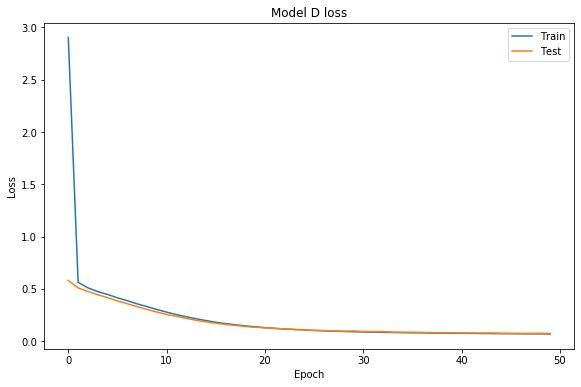


Model D performance:
Test loss with validation data = 0.073
Test loss with target data = 0.033


In [22]:
# look into training history
# Plot training & validation loss values
plt.plot(historyD.history['loss'])
plt.plot(historyD.history['val_loss'])
plt.title('Model D loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# evaluate model with the va curve
score_valid = modelD.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_target = modelD.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Model D performance:')
print('Test loss with validation data = {0:.3f}' .format(score_valid[0]))
print('Test loss with target data = {0:.3f}' .format(score_target[0]))

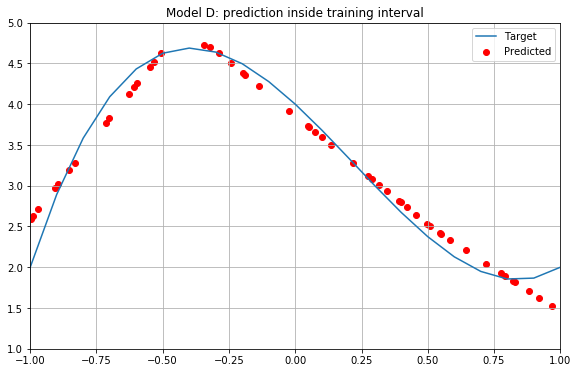

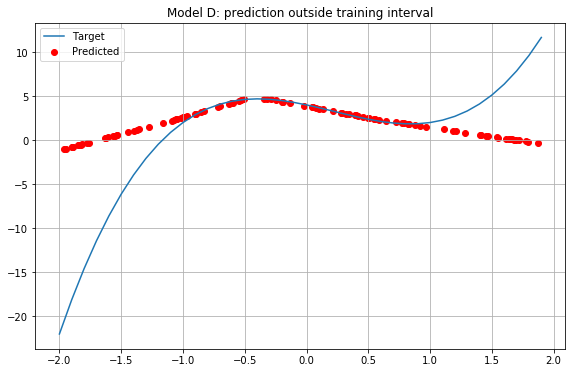

In [23]:
X = np.arange(-2, 2, 0.1)
Y = f(X,a,b,c,d)

x_predicted_D = np.random.uniform(-2, 2, 100)
y_predicted_D = modelD.predict(x_predicted_D)


plt.scatter(x_predicted_D, y_predicted_D,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.xlim(lowb,uppb)
plt.ylim(1,5)
plt.legend()
plt.title('Model D: prediction inside training interval')
plt.show()



plt.scatter(x_predicted_D, y_predicted_D,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.legend()
plt.title('Model D: prediction outside training interval')
plt.show()

## Model E ## 
### Construction and training ##

In [24]:
#create model E
modelE = tf.keras.Sequential()
modelE.add(Dense(32, input_shape=(1,), activation='tanh'))
#modelD.add(Dense(16, activation='tanh'))
#modelD.add(Dense(16, activation='relu'))

modelE.add(Dense(1))

# compile the model D choosing optimizer, loss and metrics objects
modelE.compile(optimizer='sgd', loss='mse', metrics=['mse'])

modelE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [25]:
# fit the model using training dataset
# report training progress against validation data

historyE = modelE.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nepoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1800 samples, validate on 200 samples
Epoch 1/50
1800/1800 [==============================] - 0s 210us/step - loss: 2.6682 - mean_squared_error: 2.6682 - val_loss: 0.5668 - val_mean_squared_error: 0.5668
Epoch 2/50
1800/1800 [==============================] - 0s 47us/step - loss: 0.5636 - mean_squared_error: 0.5636 - val_loss: 0.5184 - val_mean_squared_error: 0.5184
Epoch 3/50
1800/1800 [==============================] - 0s 61us/step - loss: 0.5372 - mean_squared_error: 0.5372 - val_loss: 0.5108 - val_mean_squared_error: 0.5108
Epoch 4/50
1800/1800 [==============================] - 0s 66us/step - loss: 0.5281 - mean_squared_error: 0.5281 - val_loss: 0.5044 - val_mean_squared_error: 0.5044
Epoch 5/50
1800/1800 [==============================] - 0s 47us/step - loss: 0.5179 - mean_squared_error: 0.5179 - val_loss: 0.4962 - val_mean_squared_error: 0.4962
Epoch 6/50
1800/1800 [==============================] - 0s 60us/step - loss: 0.5091 - mean_squared_error: 0.5091 - val_loss: 0.

### Training results and prediction ###

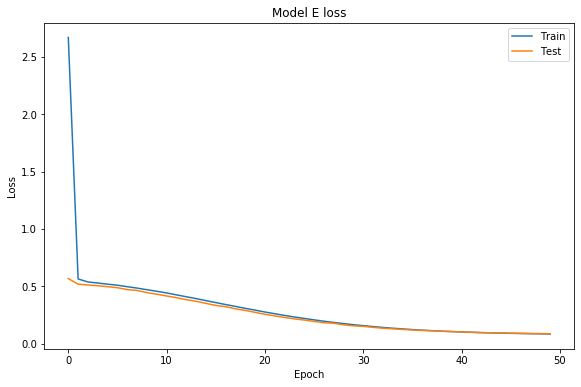


Model E performance:
Test loss with validation data = 0.086
Test loss with target data = 0.053


In [26]:
# look into training history
# Plot training & validation loss values
plt.plot(historyE.history['loss'])
plt.plot(historyE.history['val_loss'])
plt.title('Model E loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# evaluate model with the va curve
score_valid = modelE.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score_target = modelE.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print()
print('Model E performance:')
print('Test loss with validation data = {0:.3f}' .format(score_valid[0]))
print('Test loss with target data = {0:.3f}' .format(score_target[0]))

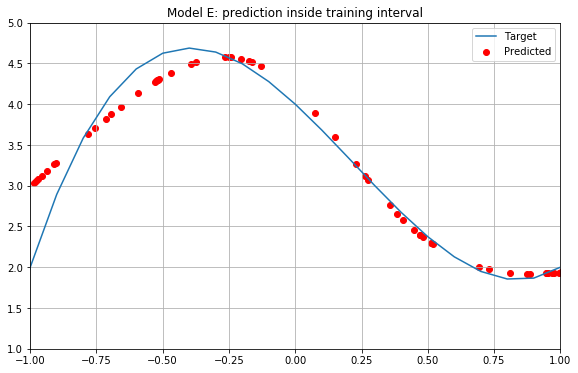

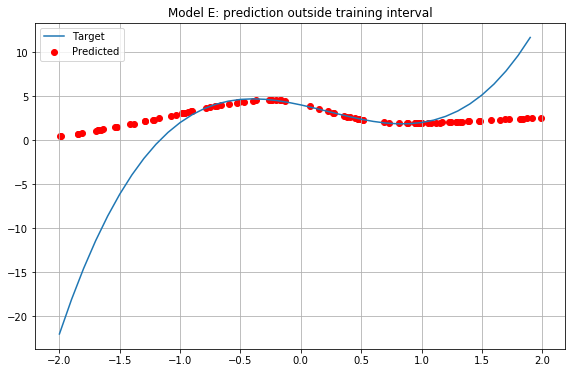

In [27]:
X = np.arange(-2, 2, 0.1)
Y = f(X,a,b,c,d)

x_predicted_E = np.random.uniform(-2, 2, 100)
y_predicted_E = modelE.predict(x_predicted_E)

plt.scatter(x_predicted_E, y_predicted_E,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.xlim(lowb,uppb)
plt.ylim(1,5)
plt.legend()
plt.title('Model E: prediction inside training interval')
plt.show()


plt.scatter(x_predicted_E, y_predicted_E,color='r', label='Predicted')
plt.plot(X, Y, label = 'Target')
plt.grid(True)
plt.legend()
plt.title('Model E: prediction outside training interval')
plt.show()

## Models comparison ##
All models were trained on the same input data for 50 epochs and using SGD as optimization function.

|    *Model*   	|       *A*      	|       *B*      	|    *C*    	|  *D* 	| *E*  |
|:------------:	|:--------------:	|:--------------:	|:---------:	|:----:	|:----:|
|   Layers  	|    16-16-16    	|    16-16-16    	|    8-8    	|  32  	| 32   |
| Activation 	| relu-tanh-relu 	| relu-tanh-relu 	| relu-tanh 	| relu 	| tanh |
|    Loss    	|      mse      	|       mae      	|    mse    	|  mse 	| mse  |

Firstly - experimenting with the various activation functions - we noticed that _sigmoid_ does not converge in this case and that a good fit can be obtained through _relu_, _tanh_ and their combinations. Different activation functions were not tested.

Then:
- comparing A to B, which differ only in the loss function, we notice that _mse_ seems to do a better job than _mae_;
- comparing A to C, we realize that with just 2 layers of 8 nodes we can get a fit very close to the one obtained with 3 layers of 16 nodes;
- comparing A and C to D and E, we see that a unique big layer cannot do the same job of 2 or 3 smaller sequential layers (but with a proper - more similiar to $f(x)$? - activation function like in E the result is not so bad);
- comparing D and E, different only in the activation function, we notice that - at least in this situation - _tanh_ does a better job than _relu_.

Finally, all models completely fail to predict data outside the training range.

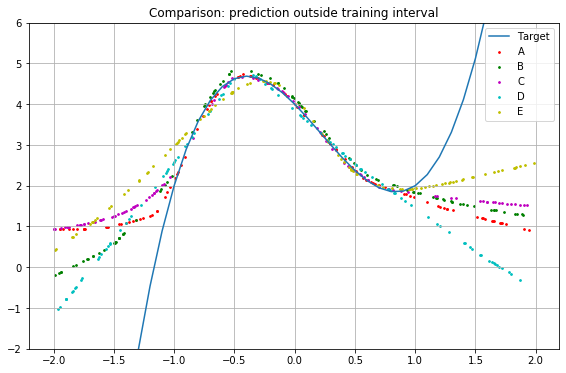

In [28]:

plt.plot(X, Y, label = 'Target')
plt.scatter(x_predicted_A, y_predicted_A,color='r', label='A', s=3)
plt.scatter(x_predicted_B, y_predicted_B,color='g', label='B', s=3)
plt.scatter(x_predicted_C, y_predicted_C,color='m', label='C', s=3)
plt.scatter(x_predicted_D, y_predicted_D,color='c', label='D', s=3)
plt.scatter(x_predicted_E, y_predicted_E,color='y', label='E', s=3)


plt.grid(True)
plt.ylim(-2,6)
plt.legend()
plt.title('Comparison: prediction outside training interval')
plt.show()